In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
df = pd.read_csv(r"Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# TotalCharges must be numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [14]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


GÖREV 1: KEŞİFCİ VERİ ANALİZİ

In [ ]:
# Adım 1: Genel resmi inceleyiniz.

In [17]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0  7590-VHVEG  Female              0     Yes         No       1    

In [ ]:
# Adım 2: Numerik ve kategorik değişkenleri yakalayınız.

In [18]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    """
           Bu fonksiyon veri setindeki kategorik, numeric ve kategorik fakat kardinal değişkenlerin isimlerini verir.
           Not: Kategorik değikenlere numerik görünümlü ketagorik değişkenlerde dahildir.

           Args:
               dataframe: dataframe
                   değişken isimleri alınmak istenen dataframe'dir,
               cat_th: int, float
                   numerik fakat kategorik olan değişkenler için sınıf eşik değeri.
               car_th: int, float
                   kategorik fakat kardinal değişkenler için sınıf eşik değeri.

           Returns:
               cat_cols: list
                   kategorik değişken listesi
               num_cols: list
                   numerik değişken listesi
               cat_but_car: list
                   kategorik görünümlü kardinal değişken listesi

           Notes:
               cat_cols + num_cols + cat_but_car = toplam değişken sayısı
               num_but_cat cat_cols'un içinde yer alıyor.

           """


    # cat_cols, cat_but_car

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


In [ ]:
# Adım 3: Numerik ve kategorik değişkenlerin analizini yapınız.

Kategorik değişkenlerin analizi
        gender  ratio
Male      3555 50.476
Female    3488 49.524
##############################


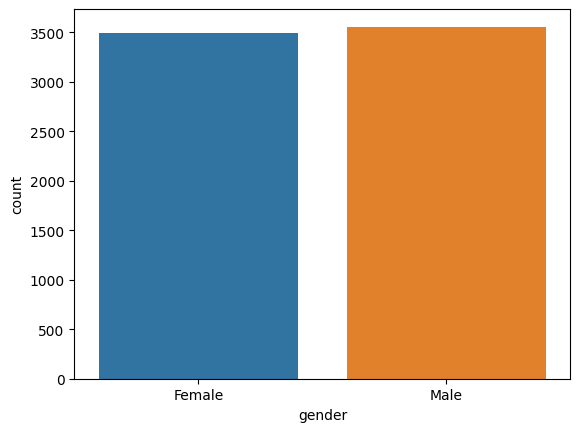

     Partner  ratio
No      3641 51.697
Yes     3402 48.303
##############################


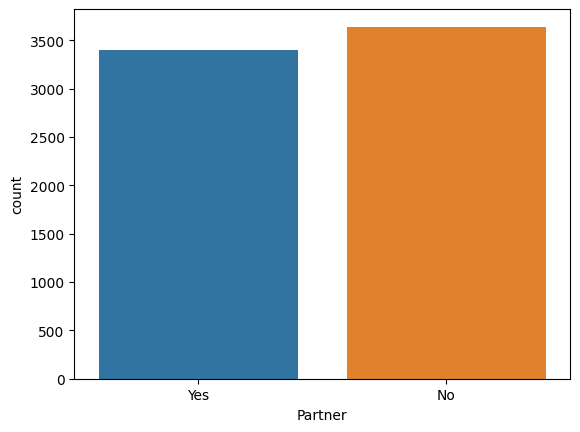

     Dependents  ratio
No         4933 70.041
Yes        2110 29.959
##############################


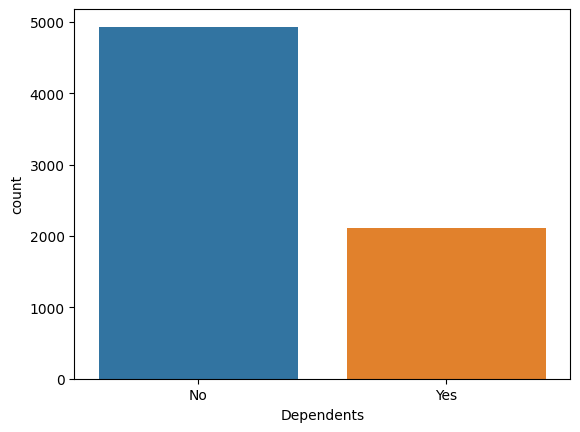

     PhoneService  ratio
Yes          6361 90.317
No            682  9.683
##############################


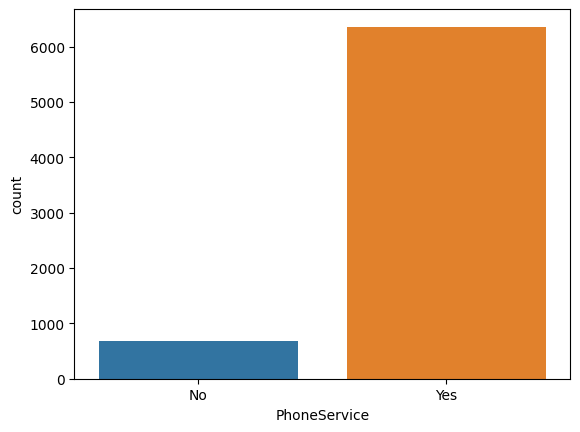

                  MultipleLines  ratio
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##############################


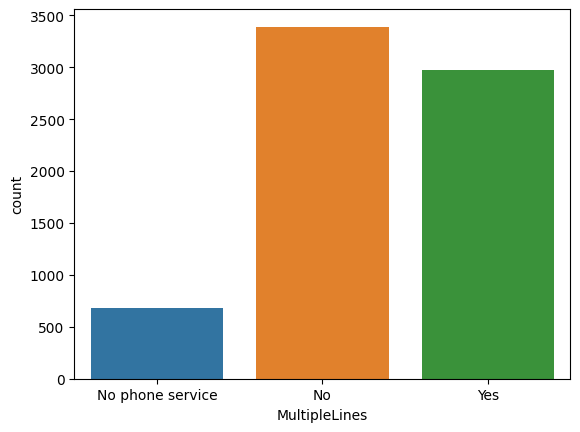

             InternetService  ratio
Fiber optic             3096 43.959
DSL                     2421 34.375
No                      1526 21.667
##############################


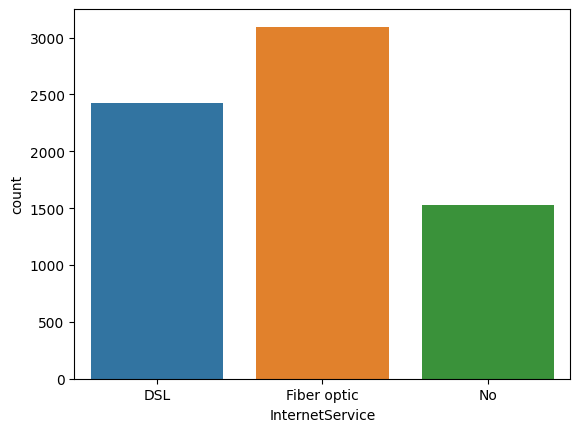

                     OnlineSecurity  ratio
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
##############################


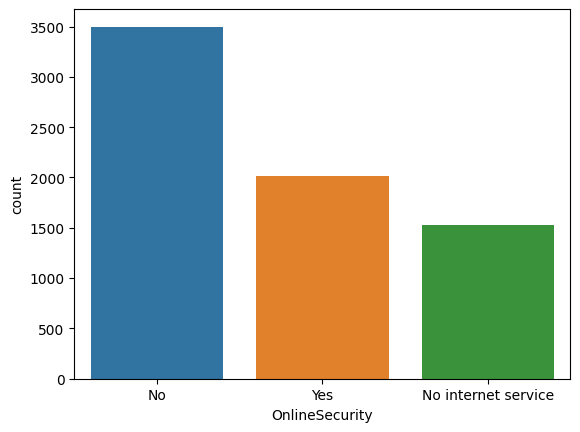

                     OnlineBackup  ratio
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
##############################


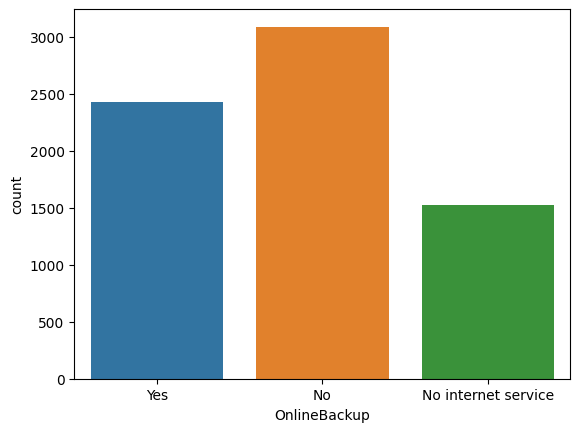

                     DeviceProtection  ratio
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
##############################


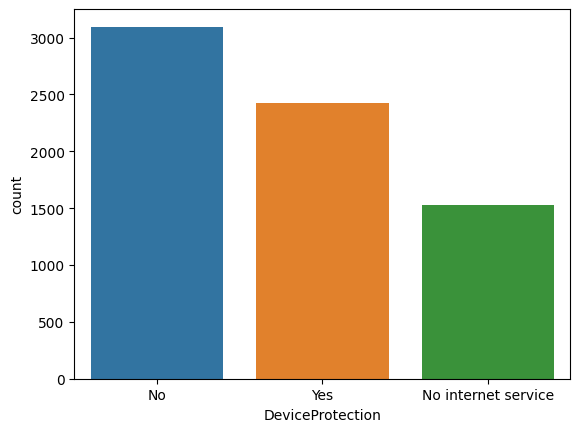

                     TechSupport  ratio
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
##############################


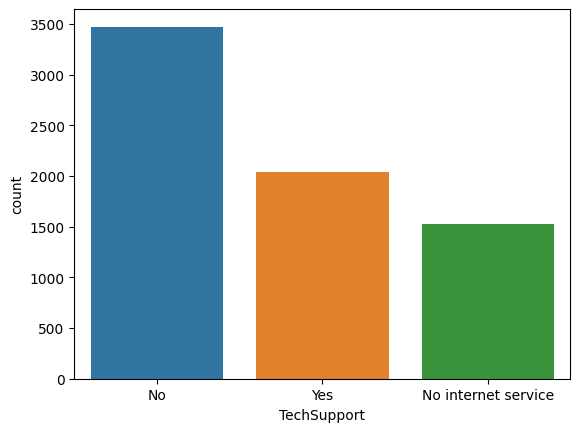

                     StreamingTV  ratio
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
##############################


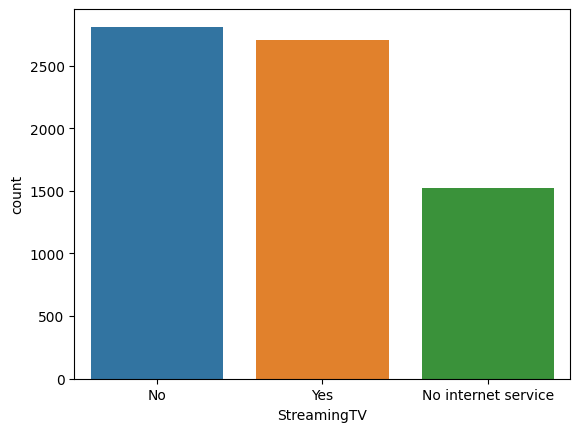

                     StreamingMovies  ratio
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
##############################


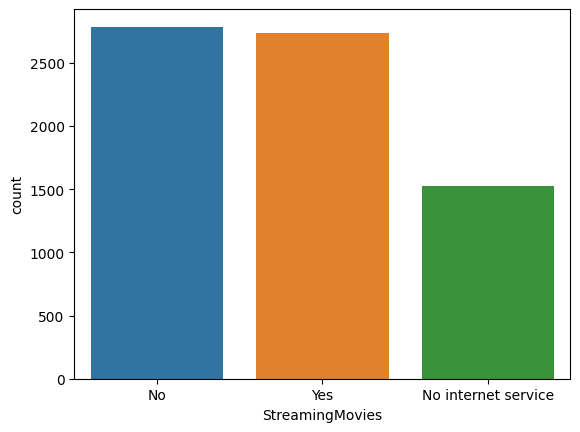

                Contract  ratio
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##############################


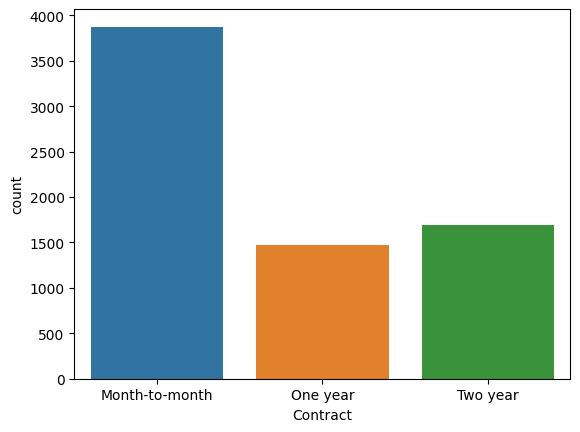

     PaperlessBilling  ratio
Yes              4171 59.222
No               2872 40.778
##############################


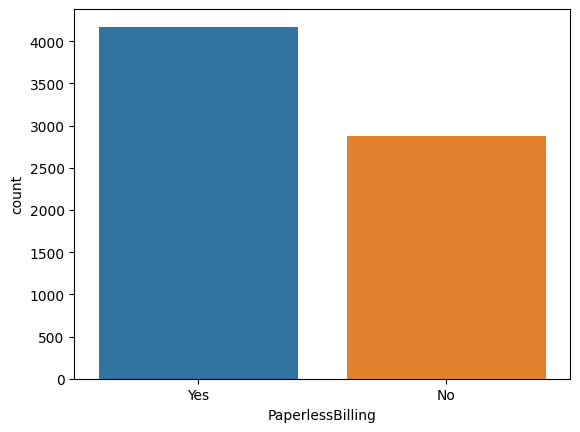

                           PaymentMethod  ratio
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##############################


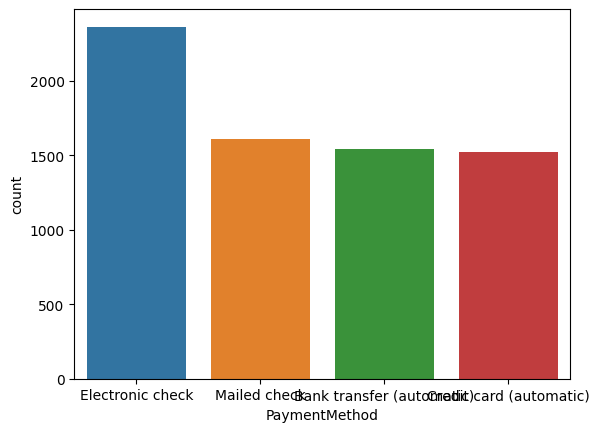

   SeniorCitizen  ratio
0           5901 83.785
1           1142 16.215
##############################


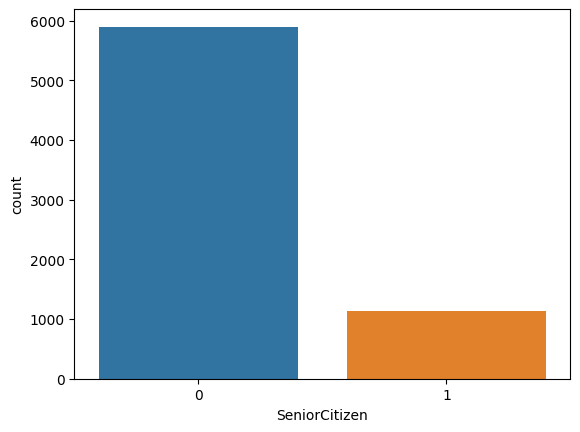

   Churn  ratio
0   5174 73.463
1   1869 26.537
##############################


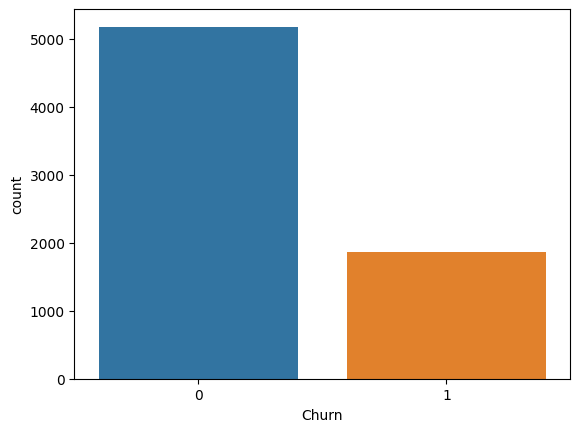

Numerik değişkenlerin analizi
count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


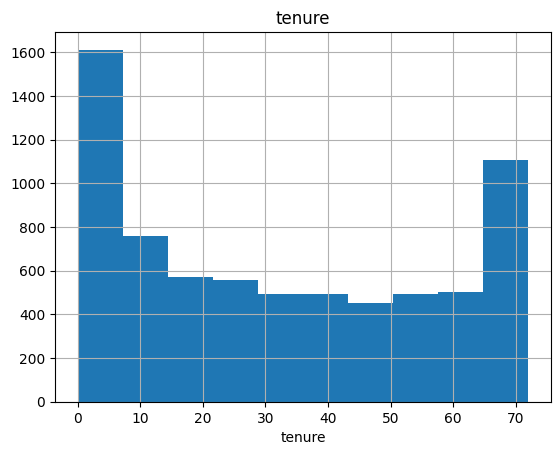

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


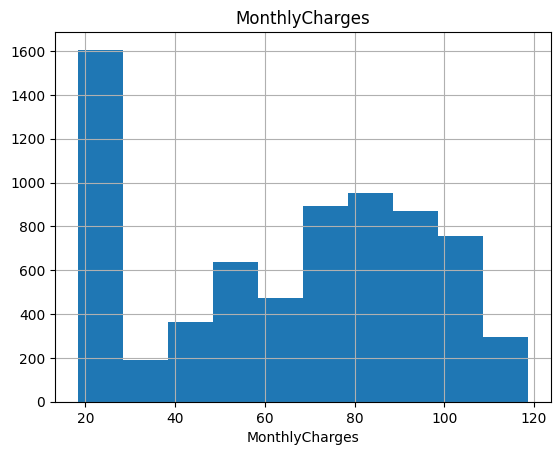

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


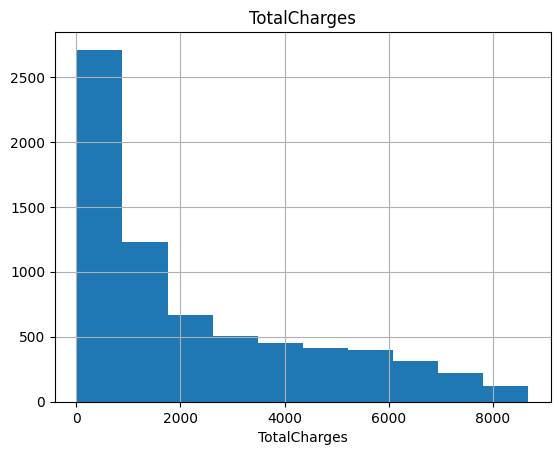

In [19]:
# Kategorik değişkenlerin analizi
print("Kategorik değişkenlerin analizi")
def cat_summary(dataframe, col_name, plot = False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), "ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##############################")
    if plot:

      sns.countplot(x=dataframe[col_name], data=dataframe)
      plt.show(block = True)

for col in cat_cols:
    cat_summary(df, col, plot = True)

# Numerik değişkenlerin analizi
print("Numerik değişkenlerin analizi")
def num_summary(dataframe,numerical_cols, plot = False):

    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_cols].describe(quantiles).T)
    if plot:
        dataframe[numerical_cols].hist()
        plt.xlabel(numerical_cols)
        plt.title(numerical_cols)
        plt.show(block = True)

for col in num_cols:
    num_summary(df, col, plot = True)

In [20]:
# Tenure'e bakıldığında 1 aylık müşterilerin çok fazla olduğunu ardından da 72 aylık müşterilerin geldiğini görüyoruz.
# tenure : Müşterinin şirkette kaldığı ay sayısı

df["tenure"].value_counts().head()

1     613
72    362
2     238
3     200
4     176
Name: tenure, dtype: int64

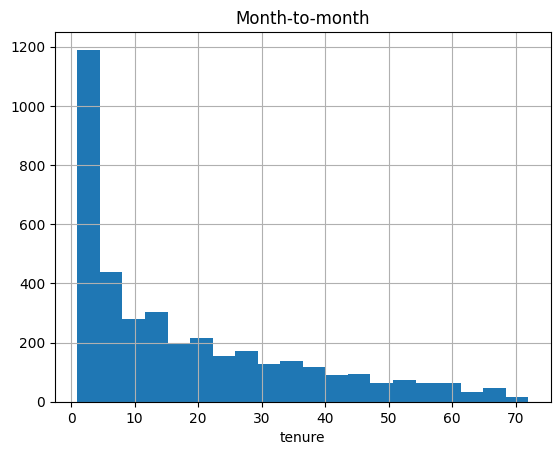

In [21]:
# Farklı kontratlardan dolayı gerçekleşmiş olabilir, aylık sözleşmesi olan kişilerin tenure ile 2 yıllık sözleşmesi olan kişilerin tenure'ne bakalım.
# MonthlyCharges : Müşteriden aylık olarak tahsil edilen tutar

df[df["Contract"] == "Month-to-month"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Month-to-month")
plt.savefig("Month-to-month Contract - Tenure.png")
plt.show()

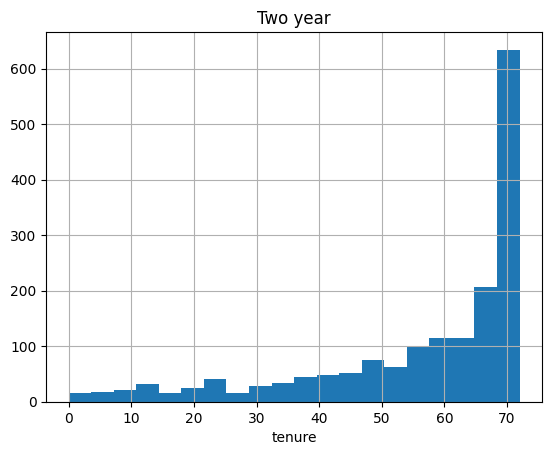

In [22]:
df[df["Contract"] == "Two year"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Two year")
plt.savefig("Two year Contract - Tenure.png")
plt.show()

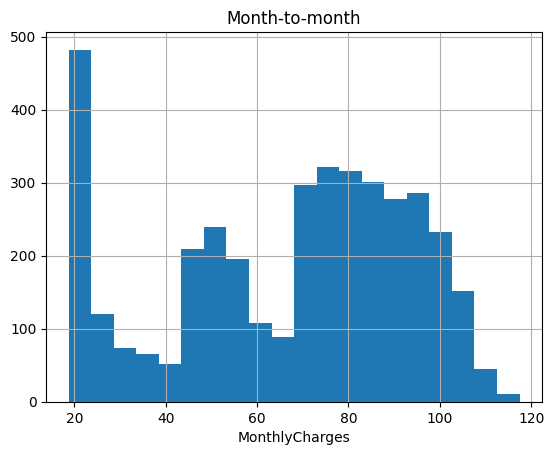

66.39849032258066

In [23]:
# MonthyChargers'a bakıldığında aylık sözleşmesi olan müşterilerin aylık ortalama ödemeleri daha fazla olabilir.
df[df["Contract"] == "Month-to-month"]["MonthlyCharges"].hist(bins=20)
plt.xlabel("MonthlyCharges")
plt.title("Month-to-month")
plt.savefig("Month-to-month Contract - MonthlyCharges.png")
plt.show()

df[df["Contract"] == "Month-to-month"]["MonthlyCharges"].mean()

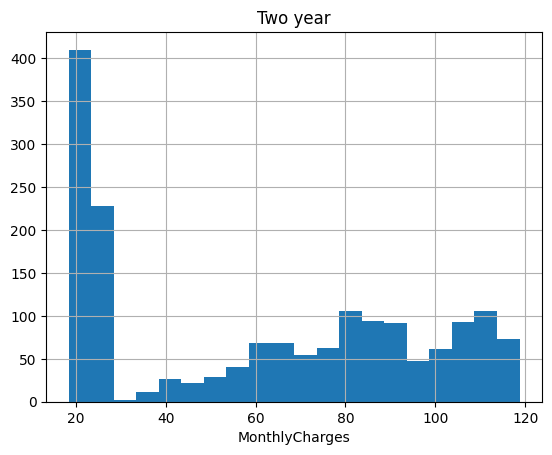

60.77041297935103

In [24]:
df[df["Contract"] == "Two year"]["MonthlyCharges"].hist(bins=20)
plt.xlabel("MonthlyCharges")
plt.title("Two year")
plt.savefig("Two year Contract - MonthlyCharges.png")
plt.show()

df[df["Contract"] == "Two year"]["MonthlyCharges"].mean()

In [ ]:
# Adım 4: Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre
# numerik değişkenlerin ortalaması)

In [25]:
# Hedef değişkene göre numerik değişkenlerin ortalaması
print("Hedef değişkene göre numerik değişkenlerin ortalaması")

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)

# # Kategorik değişkene göre hedef değişkenin ortalaması
print("Kategorik değişkenlere göre hedef değişkenin ortalaması")

def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)



Hedef değişkene göre numerik değişkenlerin ortalaması
       tenure
Churn        
0      37.570
1      17.979


       MonthlyCharges
Churn                
0              61.265
1              74.441


       TotalCharges
Churn              
0          2555.344
1          1531.796


Kategorik değişkenlere göre hedef değişkenin ortalaması
gender
        TARGET_MEAN  Count  Ratio
Female        0.269   3488 49.524
Male          0.262   3555 50.476


Partner
     TARGET_MEAN  Count  Ratio
No         0.330   3641 51.697
Yes        0.197   3402 48.303


Dependents
     TARGET_MEAN  Count  Ratio
No         0.313   4933 70.041
Yes        0.155   2110 29.959


PhoneService
     TARGET_MEAN  Count  Ratio
No         0.249    682  9.683
Yes        0.267   6361 90.317


MultipleLines
                  TARGET_MEAN  Count  Ratio
No                      0.250   3390 48.133
No phone service        0.249    682  9.683
Yes                     0.286   2971 42.184


InternetService
             TARGET_MEAN

In [ ]:
# Adım 5: Aykırı gözlem analizi yapınız.

In [26]:
# Sınırların belirlenmesi;

def outlier_thresholds(dataframe, col_name, q1_th=0.05, q3_th=0.95):
    quartile1 = dataframe[col_name].quantile(q1_th)
    quartile3 = dataframe[col_name].quantile(q3_th)
    inter_quantile_range = quartile3 - quartile1
    upper_limit = quartile3 + (1.5 * inter_quantile_range)
    lower_limit = quartile1 - (1.5 * inter_quantile_range)
    return lower_limit, upper_limit

# Aykırı değer var mı? yok mu?

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# Aykırı Değer Analizi ve Baskılama İşlemi

for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


In [ ]:
# Adım 6: Eksik gözlem analizi yapınız.

In [27]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0] # NaN değere sahip değişken isimleri
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False) # NaN değişken sayıları azalan şekilde
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0]*100).sort_values(ascending=False) # NaN değerlerin oranı
    missing_df = pd.concat([n_miss,  np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
    print(missing_df, end="\n")

    if na_name: # Eksik değerlerin isimleri gelsin mi?
        return na_columns

missing_values_table(df)

              n_miss  ratio
TotalCharges      11  0.160


In [ ]:
# Adım 7: Korelasyon analizi yapınız.

                tenure  MonthlyCharges  TotalCharges
tenure           1.000           0.248         0.826
MonthlyCharges   0.248           1.000         0.651
TotalCharges     0.826           0.651         1.000


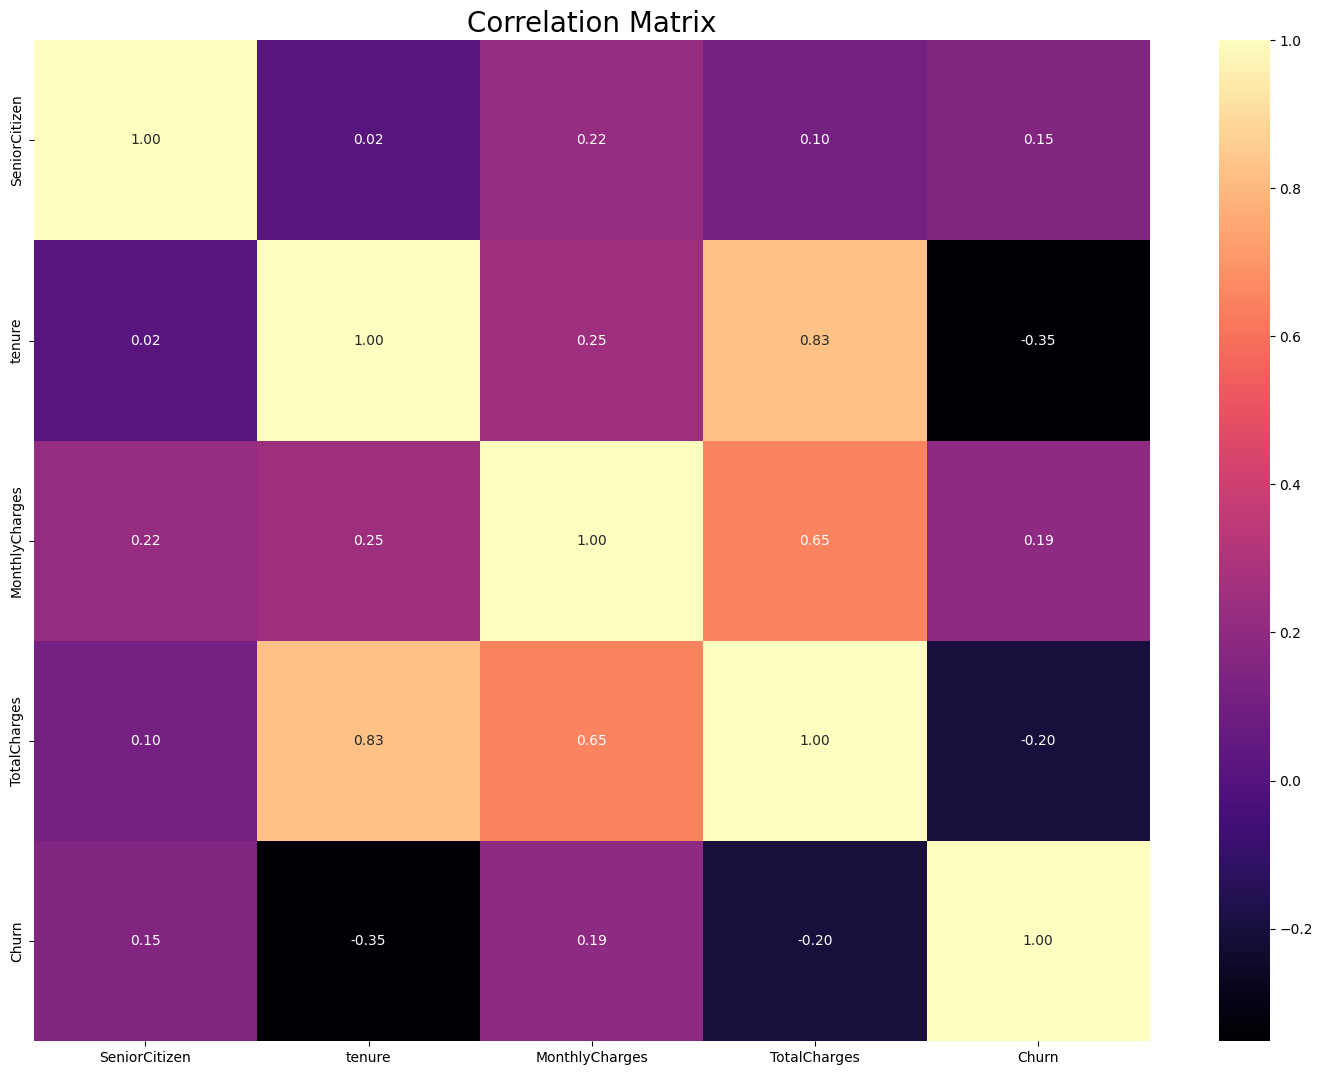

In [28]:
print(df[num_cols].corr())

# Korelasyon Matrisi

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.savefig("Correlation Matrix.png")
plt.show()

# TotalChargers'in aylık ücretler ve tenure ile yüksek korelasyonlu olduğu görülmekte


GÖREV 2: FEATURE ENGINEERING

In [ ]:
# Adım 1: Eksik ve aykırı gözlemler için gerekli işlemleri yapınız.

In [29]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [30]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0] # NaN değere sahip değişken isimleri
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False) # NaN değişken sayıları azalan şekilde
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0]*100).sort_values(ascending=False) # NaN değerlerin oranı
    missing_df = pd.concat([n_miss,  np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
    print(missing_df, end="\n")

    if na_name: # Eksik değerlerin isimleri gelsin mi?
        return na_columns

missing_values_table(df)


              n_miss  ratio
TotalCharges      11  0.160


In [32]:
# Eksik değerleri median ile dolduruyorum.
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

df.isnull().sum().sum()

0

In [33]:
# Sınırların belirlenmesi
def outlier_thresholds(dataframe, col_name, q1_th=0.05, q3_th=0.95):
    quartile1 = dataframe[col_name].quantile(q1_th)
    quartile3 = dataframe[col_name].quantile(q3_th)
    inter_quantile_range = quartile3 - quartile1
    upper_limit = quartile3 + (1.5 * inter_quantile_range)
    lower_limit = quartile1 - (1.5 * inter_quantile_range)
    return lower_limit, upper_limit

In [34]:
# Aykırı değer var mı yok mu fonksiyonu
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    filter1 = (dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)
    return dataframe[filter1].any(axis=None)

In [35]:
# Outlier yok
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


In [46]:
# Adım 2: Yeni değişkenler oluşturunuz.

In [47]:
# Tenure  değişkeninden yıllık kategorik değişken oluşturma
# Müşterinin kaç yıllık olduğunu içeren yeni bir kolon oluşturuyorum.

df.loc[(df["tenure"] >= 0) & (df["tenure"] <= 12), "NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"] > 12) & (df["tenure"] <= 24), "NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"] > 24) & (df["tenure"] <= 36), "NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"] > 36) & (df["tenure"] <= 48), "NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"] > 48) & (df["tenure"] <= 60), "NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"] > 60) & (df["tenure"] <= 72), "NEW_TENURE_YEAR"] = "5-6 Year"

In [38]:
# Kontratı 1 veya 2 yıllık müşterileri Engaged olarak belirtme
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year", "Two year"] else 0)

In [39]:
# Herhangi bir destek, yedek veya koruma almayan kişiler
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

In [40]:
# Aylık sözleşmesi bulunan ve genç olan müşteriler
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

In [41]:
# Kişinin toplam aldığı servis sayısı
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [42]:
# Herhangi bir streaming hizmeti alan kişiler
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

In [43]:
# Kişi otomatik ödeme yapıyor mu?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

In [44]:
# ortalama aylık ödeme
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)


In [45]:
# Güncel Fiyatın ortalama fiyata göre artışı
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

In [48]:
# Servis başına ücret
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

In [ ]:
# Adım 3: Encoding işlemlerini gerçekleştiriniz.

In [49]:
# Yeni kolonlar ekledik. Tekrar değişkenleri yakalamalıyız.

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 8


In [50]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'NEW_TENURE_YEAR',
 'SeniorCitizen',
 'Churn',
 'NEW_Engaged',
 'NEW_noProt',
 'NEW_Young_Not_Engaged',
 'NEW_TotalServices',
 'NEW_FLAG_ANY_STREAMING',
 'NEW_FLAG_AutoPayment']

In [51]:
num_cols

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'NEW_AVG_Charges',
 'NEW_Increase',
 'NEW_AVG_Service_Fee']

In [52]:
cat_but_car

['customerID']

In [53]:
# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

# Object ve 2 sınıfı olan değişkenler
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

In [54]:
# ONE-HOT ENCODING
# cat_cols listesinin güncelleme işlemi
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'NEW_TENURE_YEAR',
 'SeniorCitizen',
 'NEW_Engaged',
 'NEW_noProt',
 'NEW_Young_Not_Engaged',
 'NEW_FLAG_ANY_STREAMING',
 'NEW_FLAG_AutoPayment']

In [55]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

df.shape

(7043, 46)

In [56]:
# Adım 4: Numerik değişkenler için standartlaştırma yapınız.

In [57]:
df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_TotalServices,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,SeniorCitizen_1,NEW_Engaged_1,NEW_noProt_1,NEW_Young_Not_Engaged_1,NEW_FLAG_ANY_STREAMING_1,NEW_FLAG_AutoPayment_1
0,7590-VHVEG,0,1,0,1,0,1,29.850,29.850,0,1,14.925,0.500,14.925,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
1,5575-GNVDE,1,0,0,34,1,0,56.950,1889.500,0,3,53.986,0.948,14.238,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
2,3668-QPYBK,1,0,0,2,1,1,53.850,108.150,1,3,36.050,0.669,13.463,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,1,0,0,45,0,0,42.300,1840.750,0,3,40.016,0.946,10.575,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
4,9237-HQITU,0,0,0,2,1,1,70.700,151.650,1,1,50.550,0.715,35.350,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [58]:
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])

In [59]:
df[num_cols].head()

,tenure,MonthlyCharges,TotalCharges,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,-0.609,-0.745,-0.404,-0.788,-4.604,-0.061
1,0.109,-0.247,0.145,-0.122,-0.110,-0.136
2,-0.587,-0.304,-0.381,-0.428,-2.904,-0.221
3,0.348,-0.516,0.131,-0.360,-0.129,-0.537
4,-0.587,0.006,-0.368,-0.181,-2.447,2.172


In [60]:
# Adım 5: Model oluşturunuz.

In [62]:
y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

In [63]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.79
Recall: 0.65
Precision: 0.5
F1: 0.56
Auc: 0.74


In [64]:
# Yeni ürettiğimiz değişkenleri görmek için;

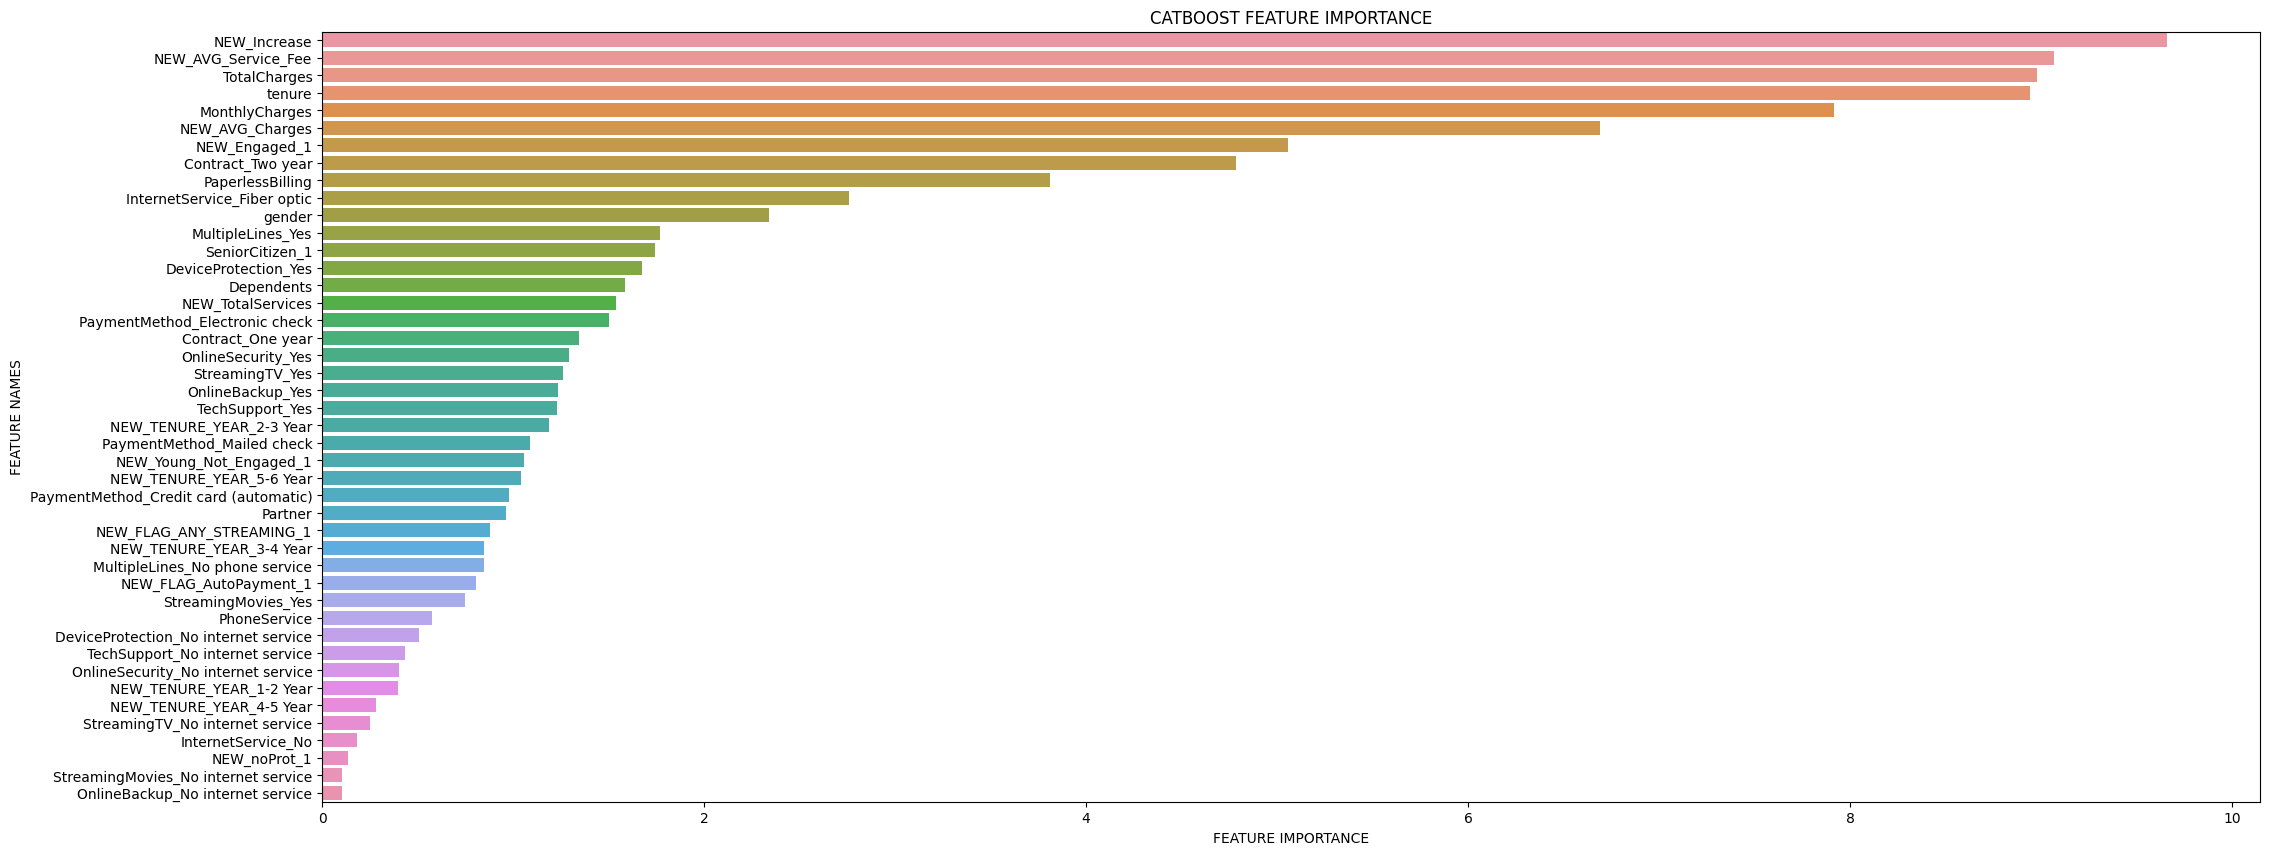

In [65]:
def plot_feature_importance(importance,names,model_type):
    # Feature importance ve feature names'den diziler oluşturma
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Sözlük kullanarak dataframe oluşturma
    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    # Dataframe'i feature importance azalacak şekilde sıralama
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    # # Çubuk grafiğinin boyutunu tanımlama
    plt.figure(figsize=(25, 10))
    # # Seaborn çubuk grafiği çizme
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    # Grafiğe etiket ekleme
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()


plot_feature_importance(catboost_model.get_feature_importance(), X.columns, 'CATBOOST')